# 📝 Exercise M4.04

In the previous Module we tuned the hyperparameter `C` of the logistic
regression without mentioning that it controls the regularization strength.
Later, on the slides on 🎥 **Intuitions on regularized linear models** we
mentioned that a small `C` provides a more regularized model, whereas a
non-regularized model is obtained with an infinitely large value of `C`.
Indeed, `C` behaves as the inverse of the `alpha` coefficient in the `Ridge`
model.

In this exercise, we ask you to train a logistic regression classifier using
different values of the parameter `C` to find its effects by yourself.

We start by loading the dataset. We only keep the Adelie and Chinstrap classes
to keep the discussion simple.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
import pandas as pd

penguins = pd.read_csv("./datasets/penguins_classification.csv")
penguins = (
    penguins.set_index("Species").loc[["Adelie", "Chinstrap"]].reset_index()
)

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [5]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(
    penguins, random_state=0, test_size=0.4
)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

We define a function to help us fit a given `model` and plot its decision
boundary. We recall that by using a `DecisionBoundaryDisplay` with diverging
colormap, `vmin=0` and `vmax=1`, we ensure that the 0.5 probability is mapped
to the white color. Equivalently, the darker the color, the closer the
predicted probability is to 0 or 1 and the more confident the classifier is in
its predictions.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model):
    model.fit(data_train, target_train)
    accuracy = model.score(data_test, target_test)
    C = model.get_params()["logisticregression__C"]

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="pcolormesh",
        cmap="RdBu_r",
        alpha=0.8,
        vmin=0.0,
        vmax=1.0,
    )
    DecisionBoundaryDisplay.from_estimator(
        model,
        data_train,
        response_method="predict_proba",
        plot_method="contour",
        linestyles="--",
        linewidths=1,
        alpha=0.8,
        levels=[0.5],
        ax=disp.ax_,
    )
    sns.scatterplot(
        data=penguins_train,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:blue", "tab:red"],
        ax=disp.ax_,
    )
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

Let's now create our predictive model.

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

## Influence of the parameter `C` on the decision boundary

Given the following candidates for the `C` parameter and the
`plot_decision_boundary` function, find out the impact of `C` on the
classifier's decision boundary.

- How does the value of `C` impact the confidence on the predictions?
- How does it impact the underfit/overfit trade-off?
- How does it impact the position and orientation of the decision boundary?

Try to give an interpretation on the reason for such behavior.

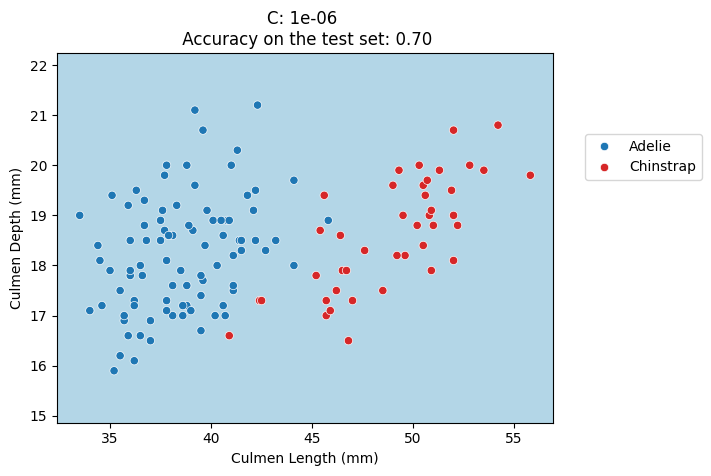

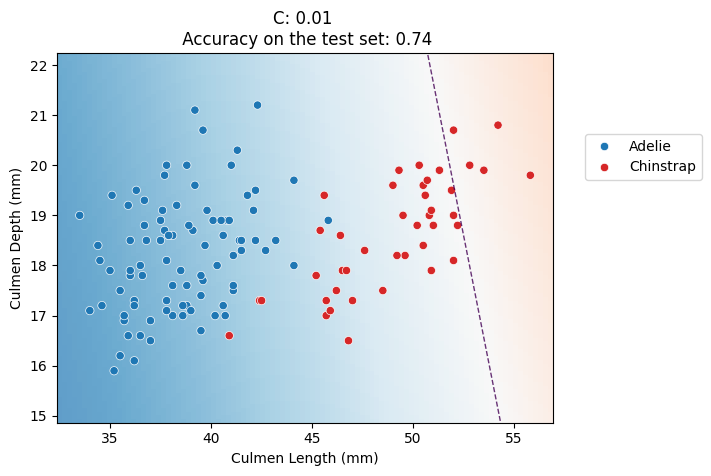

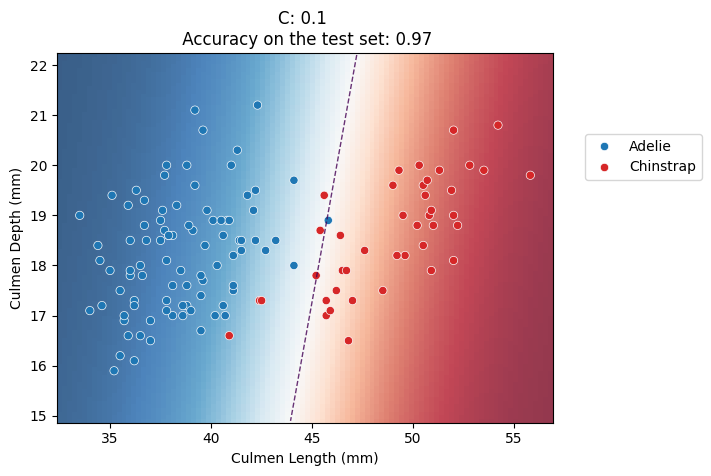

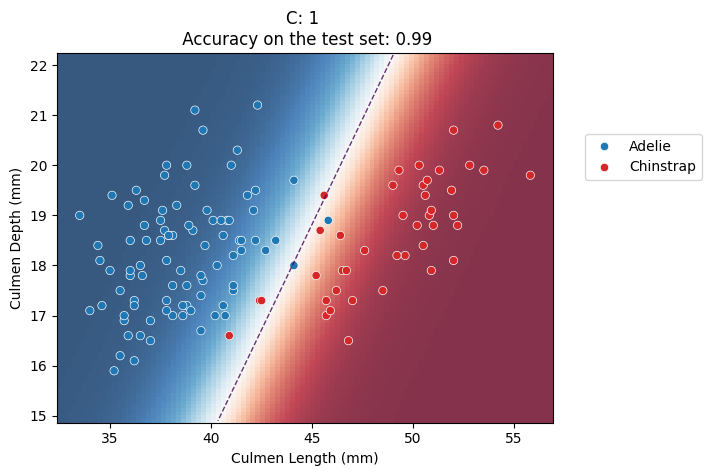

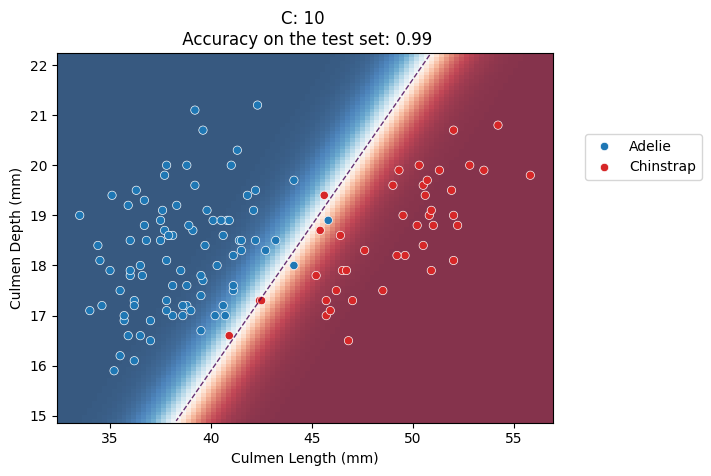

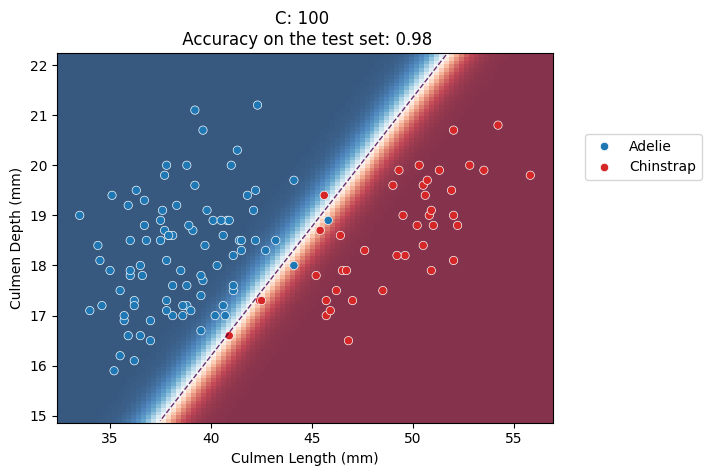

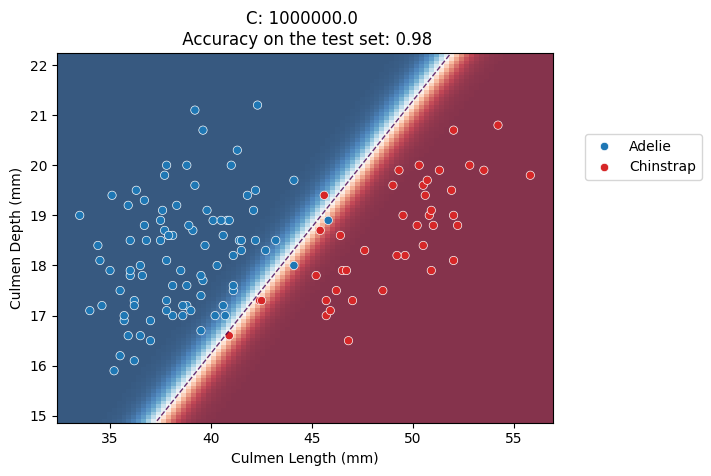

In [8]:
Cs = [1e-6, 0.01, 0.1, 1, 10, 100, 1e6]

for C in Cs:
    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=C)
    )
    plot_decision_boundary(model)
    plt.show()


## Impact of the regularization on the weights

Look at the impact of the `C` hyperparameter on the magnitude of the weights.
**Hint**: You can [access pipeline
steps](https://scikit-learn.org/stable/modules/compose.html#access-pipeline-steps)
by name or position. Then you can query the attributes of that step such as
`coef_`.

In [9]:
import numpy as np

for C in Cs:
    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=C)
    )
    model.fit(data_train, target_train)

    weights = model.named_steps["logisticregression"].coef_
    norm = np.linalg.norm(weights)

    print(f"C = {C:<8} | ||weights|| = {norm:.4f}")


C = 1e-06    | ||weights|| = 0.0001
C = 0.01     | ||weights|| = 0.4089
C = 0.1      | ||weights|| = 1.6124
C = 1        | ||weights|| = 3.6941
C = 10       | ||weights|| = 6.9049
C = 100      | ||weights|| = 10.6044
C = 1000000.0 | ||weights|| = 12.3334


## Impact of the regularization on with non-linear feature engineering

Use the `plot_decision_boundary` function to repeat the experiment using a
non-linear feature engineering pipeline. For such purpose, insert
`Nystroem(kernel="rbf", gamma=1, n_components=100)` between the
`StandardScaler` and the `LogisticRegression` steps.

- Does the value of `C` still impact the position of the decision boundary and
  the confidence of the model?
- What can you say about the impact of `C` on the underfitting vs overfitting
  trade-off?

In [ ]:
from sklearn.kernel_approximation import Nystroem

# Write your code here.